In [24]:
# bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Resumen**

En este EDA, exploraremos el conjunto de datos "AccidentesAviones.csv" con el objetivo de identificar patrones, tendencias y factores de riesgo asociados a los accidentes de avión.


In [25]:
# Carga de los datos
df = pd.read_csv("AccidentesAviones.csv")
df


,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,5003,"March 28, 2021",1835,"Near Butte, Alaska",Soloy Helicopters,?,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,4598,6,5,1,5,4,1,0,The sightseeing helicopter crashed after missi...
5004,5004,"May 21, 2021",1800,"Near Kaduna, Nigeria",Military - Nigerian Air Force,?,?,Beechcraft B300 King Air 350i,NAF203,FL-891,11,7,4,11,7,4,0,"While on final approach, in poor weather condi..."
5005,5005,"June 10, 2021",0800,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,?,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,14,12,2,12,11,1,0,The plane was carrying military personnel and ...
5006,5006,"July 04, 2021",11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,?,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,96,88,8,50,?,?,3,"While attempting to land at Jolo Airport, the ..."


**Cada columna del dataset puede ser interpretada de la siguiente manera:**


1.**Unnamed**: 0: Parece ser un índice o un identificador de fila.
2.**fecha**: La fecha en la que ocurrió el accidente.
3.**HORA declarada**: La hora declarada del accidente.
4.**Ruta**: La ubicación o ruta del accidente.
5.**Operador**: La compañía u organización que operaba la aeronave.
6.**flight_no**: El número de vuelo, si está disponible.
7.**route**: La ruta del vuelo.
8.**ac_type**: El tipo de aeronave involucrada en el accidente.
9.**registration**: El número de registro de la aeronave.
10.**cn_ln**: El número de construcción y línea de la aeronave.
11.**all_aboard**: El número total de personas a bordo.
12.**PASAJEROS A BORDO**: El número de pasajeros a bordo.
13.**crew_aboard**: El número de tripulación a bordo.
14.**cantidad de fallecidos**: El número total de personas fallecidas en el accidente.
15.**passenger_fatalities**: El número de pasajeros fallecidos.
16.**crew_fatalities**: El número de miembros de la tripulación fallecidos.
17.**ground**: Número de personas en tierra afectadas por el accidente.
18.**summary**: Un resumen o descripción del accidente.

**1.Identificación de Valores Atípicos (Outliers)**

In [114]:
# Realizamos un análisis exploratorio inicial
# Aqui se comienza por calcular estadísticas descriptivas
df.describe().round(2)

,Unnamed: 0,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground
count,5008.00,4991.00,4787.00,4789.00,5000.00,4773.00,4773.00,4964.00
mean,2503.50,31.12,26.88,4.52,22.29,18.94,3.59,1.72
std,1445.83,45.48,44.04,3.76,35.00,34.07,3.18,55.50
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1251.75,7.00,3.00,2.00,4.00,1.00,2.00,0.00
50%,2503.50,16.00,12.00,4.00,11.00,7.00,3.00,0.00
75%,3755.25,35.00,30.00,6.00,25.00,21.00,5.00,0.00
max,5007.00,644.00,614.00,83.00,583.00,560.00,43.00,2750.00


Los resultados descriptivos proporcionan información valiosa sobre diferentes columnas de nuestro dataset.


**all_aboard**: Esta columna muestra la cantidad de personas a bordo en promedio, que es de aproximadamente 31 personas por accidente. Sin embargo, la desviación estándar es alta, lo que indica una variabilidad significativa en el número de personas a bordo. Los valores mínimos y máximos revelan que hay accidentes sin personas a bordo y algunos con un número muy alto de personas a bordo, lo que podría indicar errores o valores atípicos en los datos.

**PASAJEROS A BORDO**: Similar a "all_aboard", esta columna muestra el número promedio de pasajeros a bordo, que es aproximadamente 27. Nuevamente, hay una alta variabilidad, y los valores mínimo y máximo indican que hay accidentes sin pasajeros y algunos con una cantidad inusualmente alta de pasajeros.


**cantidad de fallecidos**: La columna "cantidad de fallecidos" muestra la cantidad promedio de fallecidos por accidente, que es de alrededor de 22 personas. La variabilidad es alta, y los valores mínimo y máximo indican que hay accidentes sin fallecidos y otros con un número excepcionalmente alto de víctimas fatales.


**ground**: La columna "ground" indica la cantidad promedio de víctimas en tierra por accidente, que es de aproximadamente 1,7. La desviación estándar es muy alta, lo que indica que esta variable puede variar significativamente entre accidentes. Además, el valor máximo es muy alto (2750), lo que sugiere la presencia de valores atípicos extremos.



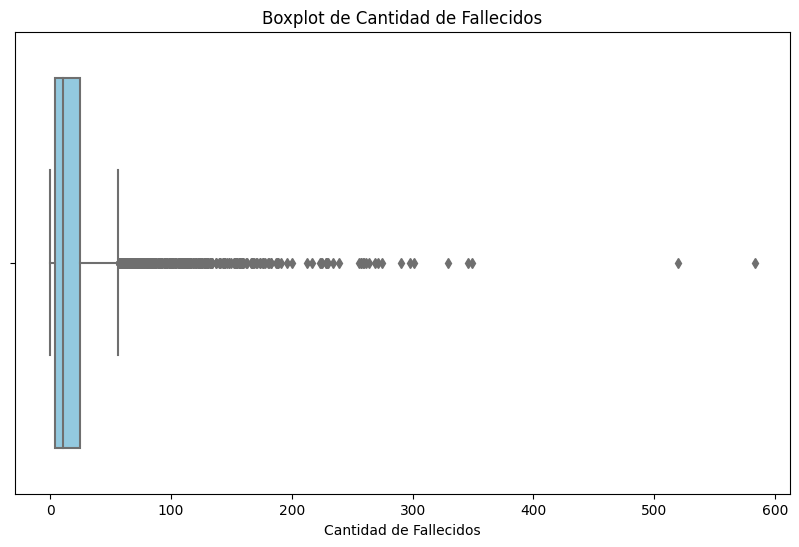

In [115]:
# Se crea un gráfico de caja (boxplot) para visualizar valores atípicos en la variable "cantidad de fallecidos"
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['cantidad de fallecidos'], color='skyblue')
plt.title('Boxplot de Cantidad de Fallecidos')
plt.xlabel('Cantidad de Fallecidos')
plt.show()

**Analisis del boxplot.**

Al analizar el gráfico de caja de la variable "cantidad de fallecidos" en el conjunto de datos, observamos que la distribución de los fallecidos se concentra principalmente en un rango de 4 a 25, con una mediana que indica una ubicación central alrededor de 11 fallecidos. Aunque la mayoría de los valores se encuentran dentro de la caja, existen algunos valores atípicos que se extienden más allá del bigote derecho, lo que sugiere una asimetría en la distribución hacia valores más altos. Esto indica que, en casos raros, se han registrado un número significativamente mayor de fallecidos en accidentes. En consecuencia, se resalta la necesidad de investigar y comprender más a fondo estos eventos excepcionales, considerando medidas de seguridad y prevención adicionales en la industria de la aviación.

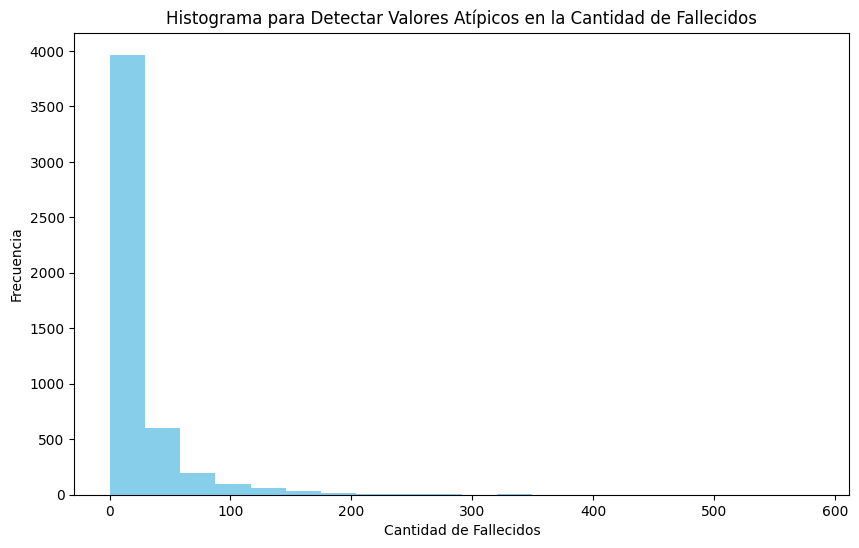

In [116]:
plt.figure(figsize=(10, 6))
plt.hist(df['cantidad de fallecidos'], bins=20, color='skyblue')
plt.title('Histograma para Detectar Valores Atípicos en la Cantidad de Fallecidos')
plt.xlabel('Cantidad de Fallecidos')
plt.ylabel('Frecuencia')
plt.show()


**Análisis del histograma anterior**

Observando el histograma, se aprecia que la mayoría de los accidentes presentan una cantidad relativamente baja de fallecidos, evidenciado por la mayor altura de las barras en la parte izquierda del gráfico. A medida que se avanza hacia la derecha en el histograma, las barras disminuyen en altura, lo que indica que los accidentes con una cantidad significativamente alta de fallecidos son menos frecuentes. Esto sugiere un sesgo hacia la izquierda en la distribución de la cantidad de fallecidos, destacando que la mayoría de los accidentes involucran un número reducido de víctimas. No obstante, se identifican valores atípicos en la parte derecha del histograma, indicando la presencia de eventos en los que la cantidad de fallecido fue inusualmente alta, lo que podría requerir una atención y análisis más detenido.

**2. Identificación de valores faltantes** 

In [104]:
# Se carga el conjunto de datos, indicando que los signos de interrogación deben considerarse como NaN
df = pd.read_csv("AccidentesAviones.csv", na_values="?")

# Búsqueda de valores faltantes 
valores_faltantes = df.isnull().sum()  # Calcula la cantidad de valores faltantes en cada columna
porcentaje_faltante = (valores_faltantes / len(df)) * 100  # Calcula el porcentaje de valores faltantes

# se crea un DataFrame para los valores faltantes
datos_faltantes = pd.DataFrame({'Valores Faltantes': valores_faltantes, '% Faltante': porcentaje_faltante})

# se ordena el DataFrame por porcentaje de valores faltantes en orden descendente
datos_faltantes = datos_faltantes.sort_values(by='% Faltante', ascending=False)

datos_faltantes


,Valores Faltantes,% Faltante
flight_no,3682,73.522364
HORA declarada,1504,30.031949
route,763,15.235623
cn_ln,667,13.318690
registration,272,5.431310
crew_fatalities,235,4.692492
passenger_fatalities,235,4.692492
PASAJEROS A BORDO,221,4.412939
crew_aboard,219,4.373003
summary,59,1.178115


Los resultados anteriores muestran la cantidad de valores faltantes en cada columna de nuestro conjunto de datos, junto con el porcentaje de faltantes correspondiente.

**flight_no**: Esta columna tiene un alto porcentaje de valores faltantes, alrededor del 73.52%. Esto podría deberse a que no se registró el número de vuelo en muchos casos.

**HORA declarada**: La hora declarada de los accidentes aéreos es importante, y el 30.03% de los datos están ausentes en esta columna, la falta de esta información puede dificultar el análisis de tendencias horarias de accidentes.

**route**: La información sobre la ruta de vuelo también es relevante en el análisis de los accidentes, y el 15.24% de los datos no están disponibles, por lo cual esto podría afectar la capacidad de identificar patrones geográficos en los accidentes.


Con lo anterior podemos ver y deducir que la cantidad de valores faltantes en estas columnas puede afectar la calidad y la completitud de nuestro análisis. Es recomendable tratar de obtener más información ya que la calidad de nuestras conclusiones dependerá de la integridad de los datos.



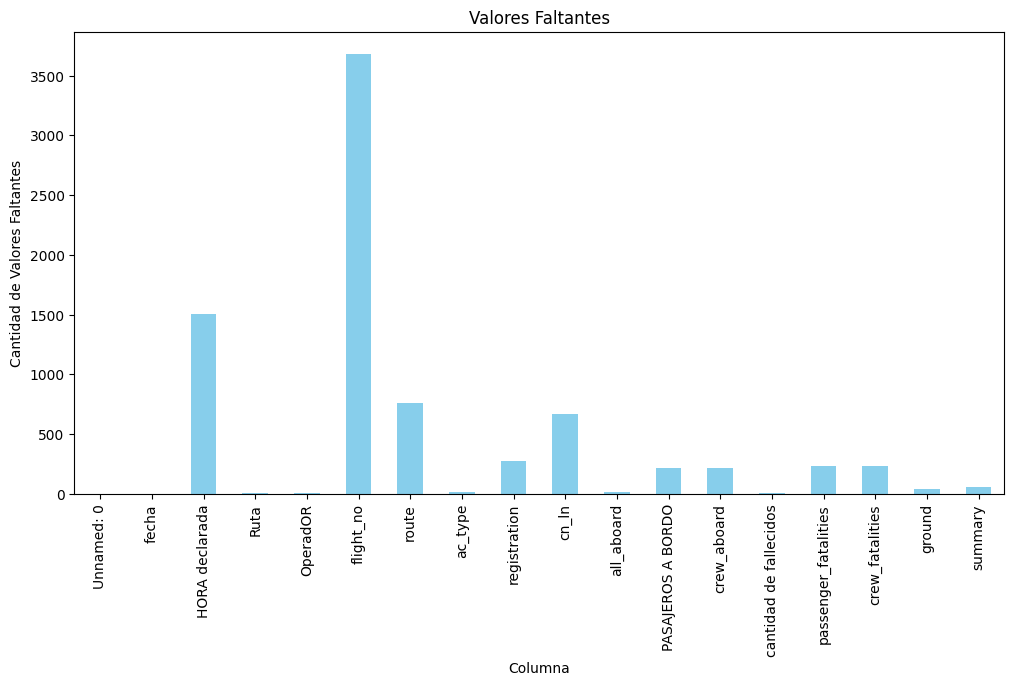

In [29]:
# Aqui se crea un gráfico de barras que muestra la cantidad de valores faltantes por columna
plt.figure(figsize=(12, 6))
valores_faltantes.plot(kind='bar', color='skyblue')
plt.title('Valores Faltantes')
plt.xlabel('Columna')
plt.ylabel('Cantidad de Valores Faltantes')
plt.xticks(rotation=90)
plt.show()


Como ya vimos anteriormente, tambien en este grafico podemos observar que las columnas flight_no, asi como la HORA declarada son las columnas con mayor cantidad de datos faltantes en nuestro dataset, esto plantea desafíos en la interpretación de nuestros resultados.

**3.Registros Duplicados**

In [133]:
# Se especifican las columnas que se utilizarán para identificar duplicados
columnas_duplicadas = ["fecha", "HORA declarada", "route", "ac_type"]

# Se encuentra registros duplicados basados en las columnas especificadas
duplicados = df[df.duplicated(subset=columnas_duplicadas, keep=False)]

# Muestra los registros duplicados
print("Registros Duplicados:")
duplicados


Registros Duplicados:


,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary


Como podemos observar no se encontraron resitros duplicados

**4.Graficos pertinentes y Visualización de Datos**

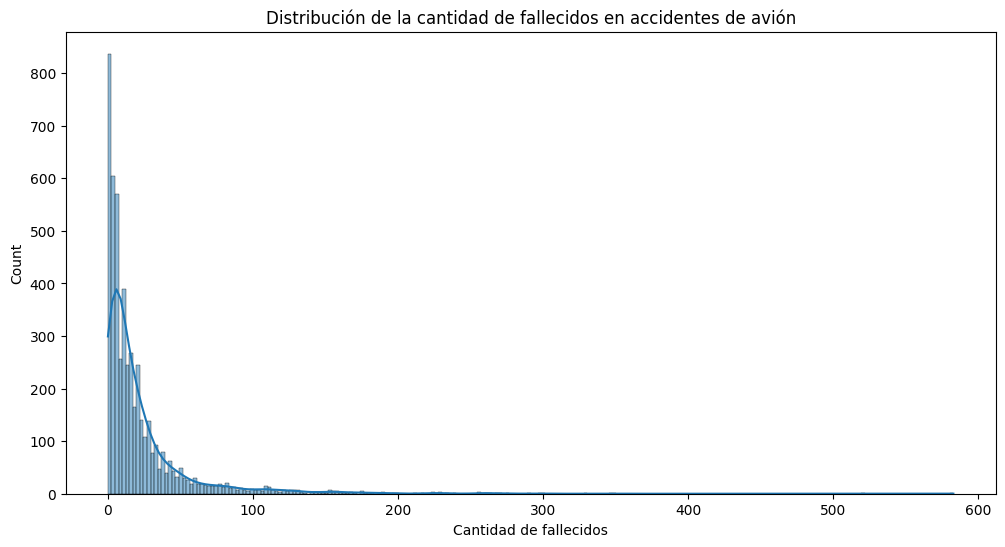

In [120]:

# Visualiza la distribución de algunas variables relevantes
# Por ejemplo, la cantidad de fallecidos y la hora del accidente
plt.figure(figsize=(12, 6))
sns.histplot(df['cantidad de fallecidos'], kde=True)
plt.title('Distribución de la cantidad de fallecidos en accidentes de avión')
plt.xlabel('Cantidad de fallecidos')
plt.show()

Al observar el gráfico de la cantidad de fallecidos en accidentes de avión, se nota que la mayoría de los accidentes tienen un número bajo de víctimas, lo que es coherente con lo anteriormente analizado. Sin embargo, el gráfico también sugiere que existen algunos eventos atipicos , lo que podría indicar accidentes de gran magnitud. Además, la presencia de una línea suave  en el gráfico permite apreciar la distribución de manera más detallada, mostrando cómo se agrupan los valores y resaltando la asimetría hacia la izquierda de la distribución.

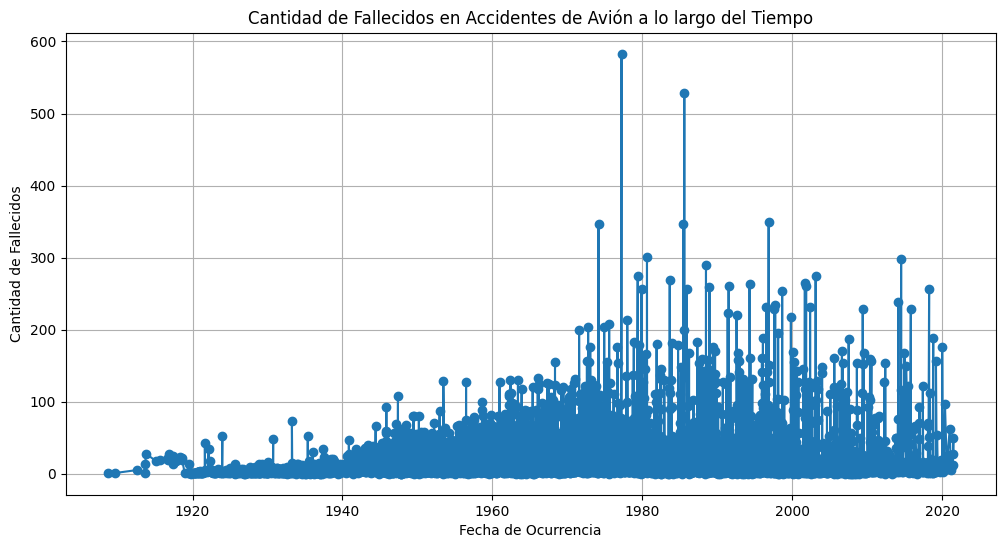

In [123]:
df['fecha'] = pd.to_datetime(df['fecha'])

# Se crea un DataFrame que agrupe y sume la cantidad de fallecidos por fecha
fallecidos_por_fecha = df.groupby('fecha')['cantidad de fallecidos'].sum()

# Aqui se crea un gráfico de serie de tiempo
plt.figure(figsize=(12, 6))
plt.plot(fallecidos_por_fecha.index, fallecidos_por_fecha.values, linestyle='-', marker='o')
plt.title('Cantidad de Fallecidos en Accidentes de Avión a lo largo del Tiempo')
plt.xlabel('Fecha de Ocurrencia')
plt.ylabel('Cantidad de Fallecidos')
plt.grid(True)
plt.show()


El gráfico anterior representa la evolución de la cantidad de fallecidos en accidentes de avión a lo largo de las décadas. Al analizar el gráfico, se percibe una tendencia general a la disminución en el número de víctimas mortales en accidentes de avión a medida que avanzamos en el tiempo. No obstante, es importante considerar que en las primeras décadas, la cantidad de vuelos comerciales era significativamente menor, lo que puede haber influido en la menor cantidad de accidentes y, por ende, en la cantidad de fallecidos. Sin embargo, se destacan algunos picos notables en la cantidad de fallecidos, particularmente en la década de los 80, que podrían asociarse con eventos excepcionales de gran magnitud en la historia de la aviación.

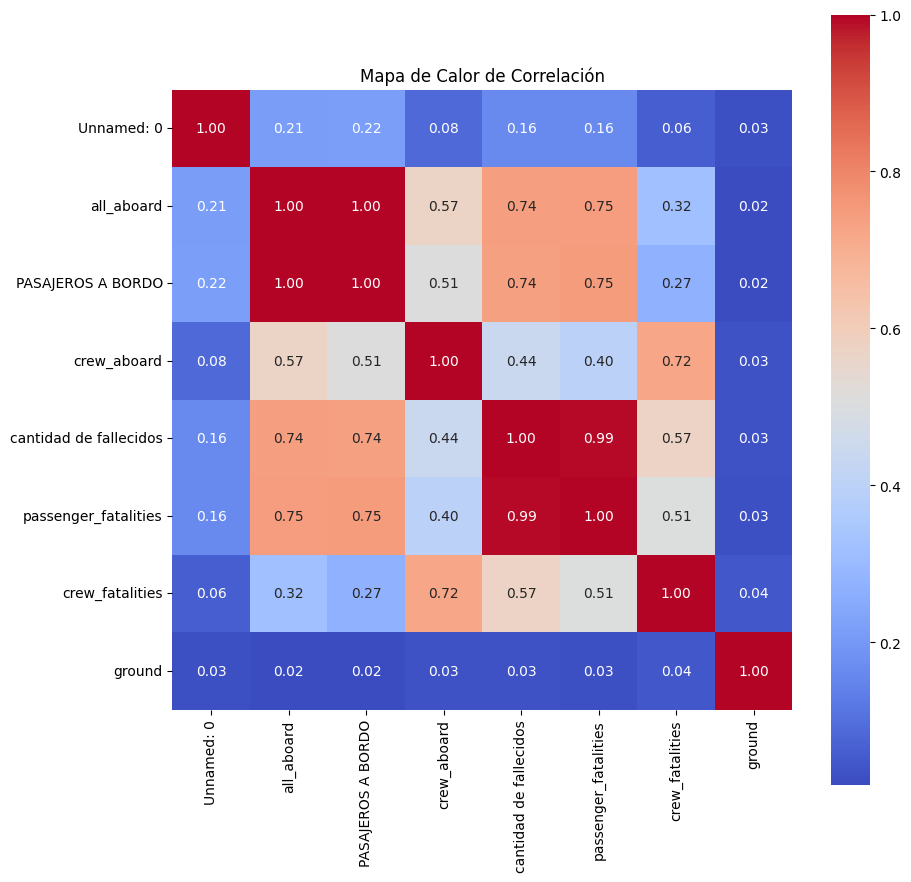

In [125]:
# Crea un DataFrame con las columnas numéricas
columnas_numericas = df.select_dtypes(include=['number'])

# Calcula la matriz de correlación
corr = columnas_numericas.corr()

# Crea un mapa de calor
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cbar=True, square=True, annot=True, fmt='.2f',
            annot_kws={'size': 10}, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()


En el análisis de correlación, se evidencia que las variables numéricas en el conjunto de datos generalmente no presentan correlaciones de causa y efecto significativas. Sin embargo, se identifica una correlación positiva leve entre la cantidad de pasajeros a bordo y la cantidad de fallecidos, lo que sugiere que a medida que aumenta el número de pasajeros, es más probable que el número de víctimas mortales también aumente. Esta asociación puede deberse a razones como la capacidad de la aeronave y la disponibilidad de servicios de seguridad, pero es importante destacar que la correlación es relativamente baja, lo que indica que otros factores también influyen en el resultado. En general, el mapa de calor de correlación subraya la complejidad de los accidentes de aviación y la importancia de considerar múltiples variables en su análisis.

In [126]:
# Crear una tabla cruzada entre el operador y la cantidad de fallecidos
tabla_cruzada = pd.crosstab(df['OperadOR'], df['cantidad de fallecidos'])

# Puedes ordenar la tabla por la cantidad de fallecidos si lo deseas
tabla_cruzada = tabla_cruzada.sort_values(by=1, ascending=False)

# Visualizar la tabla cruzada
tabla_cruzada


cantidad de fallecidos,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,271.0,275.0,290.0,298.0,301.0,329.0,346.0,349.0,520.0,583.0
OperadOR,,,,,,,,,,,,,,,,,,,,,
US Aerial Mail Service,0,32,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aeropostale,0,10,7,3,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
National Air Transport,0,8,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Varney Air Lines,0,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Philippine Air Lines,1,7,2,2,3,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Executive Jet Sales Inc.,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Executive Airlines,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Evolga,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


En la tabla aterior:

Las filas corresponden a diferentes operadores de aviones. Cada fila muestra un operador específico.
Las columnas representan la cantidad de fallecidos en un accidente. Cada columna muestra una cantidad específica de fallecidos.
Los valores en la tabla indican la cantidad de accidentes registrados para cada combinación de operador y cantidad de fallecidos. Por ejemplo, en la celda donde se cruza "US Aerial Mail Service" con "1.0", el valor es 32, lo que significa que hubo 32 accidentes registrados bajo ese operador en los que hubo exactamente 1 fallecido.

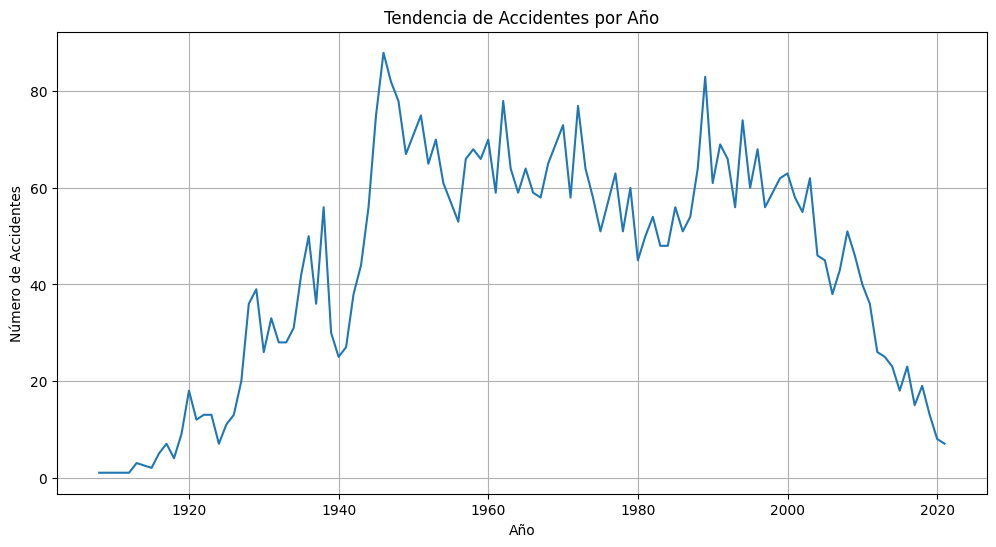

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar y contar por año
accidentes_por_anio = df.groupby(df['fecha'].dt.year)['Unnamed: 0'].count()

# Crear el gráfico de tendencias por año
plt.figure(figsize=(12, 6))
accidentes_por_anio.plot(kind='line')
plt.title('Tendencia de Accidentes por Año')
plt.xlabel('Año')
plt.ylabel('Número de Accidentes')
plt.grid(True)
plt.show()


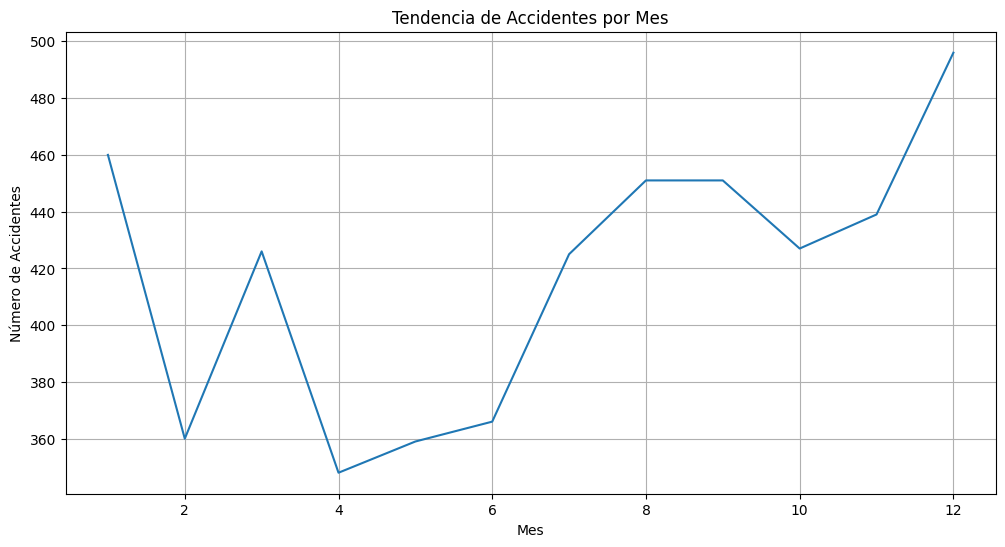

In [74]:
# Agrupar y contar por mes
accidentes_por_mes = df.groupby(df['fecha'].dt.month)['Unnamed: 0'].count()

# Crear el gráfico de tendencias por mes
plt.figure(figsize=(12, 6))
accidentes_por_mes.plot(kind='line')
plt.title('Tendencia de Accidentes por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Accidentes')
plt.grid(True)
plt.show()


**Conclusiones Finales**

En este EDA, se identificaron valores faltantes en ciertas columnas, algunos valores atípicos en la cantidad de fallecidos, y no se encontraron registros duplicados en el conjunto de datos. Las visualizaciones indican que...

Estos hallazgos son esenciales para comprender los factores de riesgo asociados a los accidentes de avión y pueden proporcionar información valiosa para futuros análisis o medidas preventivas.
